In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [2]:
## create dtf

data = pd.read_csv("data.csv")

## dropping all columns except the following
data = data[['student_star','comments']]

# 5.0 to 4.0 - Good
# 3.5 to 2.5 - Average
# 2.0 to 1.0 - Bad

data['student_star'] = data['student_star'].replace([5.0],'Good')
data['student_star'] = data['student_star'].replace([4.5],'Good')
data['student_star'] = data['student_star'].replace([4.0],'Good')

data['student_star'] = data['student_star'].replace([3.5],'Average')
data['student_star'] = data['student_star'].replace([3.0],'Average')
data['student_star'] = data['student_star'].replace([2.5],'Average')

data['student_star'] = data['student_star'].replace([2.0],'Bad')
data['student_star'] = data['student_star'].replace([1.5],'Bad')
data['student_star'] = data['student_star'].replace([1.0],'Bad')

## rename columns
data = data.rename(columns={"student_star":"Labels", "comments":"Text"})

## dropping rows with na
data = data.dropna()

## print 5 random rows
data.sample(5)

## removing blank rows
data = data.dropna()

In [3]:
#Looking at the class distribution
data['Labels'].value_counts()

Good       11814
Bad         4764
Average     3415
Name: Labels, dtype: int64

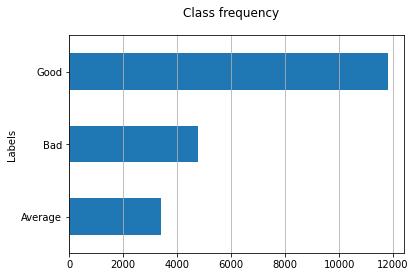

In [6]:
#Looking at the class distribution
fig, ax = plt.subplots()
fig.suptitle("Class frequency", fontsize=12)
data["Labels"].reset_index().groupby("Labels").count().sort_values(by = "index").plot(kind = "barh", legend=False, ax=ax).grid(axis = 'x')
plt.show()

In [7]:
## Downloading and storing english stop words

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teacher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
## Data snapshot

data.head()

,Labels,Text
0,Good,"This class is hard, but its a two-in-one gen-e..."
1,Good,Definitely going to choose Prof. Looney\'s cla...
2,Good,I overall enjoyed this class because the assig...
3,Good,"Yes, it\'s possible to get an A but you\'ll de..."
4,Good,Professor Looney has great knowledge in Astron...


In [9]:
#Removing punctuation
data['Text'] = data['Text'].str.replace('[^\w\s]','')

#Removing stopwords
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Stemming
stemmer = PorterStemmer()
data['Text'] = data['Text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

c:\users\teacher\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Good       11814
Bad         4764
Average     3415
Name: Labels, dtype: int64


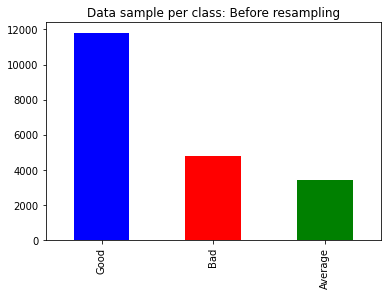

In [10]:
#Looking at class distribution

my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(data)))
label_count = data.Labels.value_counts()
print(label_count)
label_count.plot(kind='bar', color=my_colors, title='Data sample per class: Before resampling');

In [11]:
## Split data into 70% training and 30% testing set

feature_cols = ['Text']
X = data[feature_cols]
y = data.Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
#Using Tf-Idf to get features

vect = TfidfVectorizer()
X_train_dtm = vect.fit_transform(X_train.Text)
X_test_dtm = vect.transform(X_test.Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(13995, 12459)
(5998, 12459)


In [14]:
#Random oversampling the training set

smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train_dtm, y_train)
X_train_dtm = X_SMOTE
y_train = y_SMOTE

Good       8286
Average    8286
Bad        8286
Name: Labels, dtype: int64


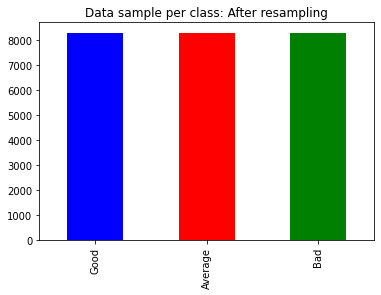

In [12]:
#Looking at class distribution

my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(data)))
label_count = y_train.value_counts()
print(label_count)
label_count.plot(kind='bar', color=my_colors, title='Data sample per class: After resampling');

In [14]:
## Preparing a dataframe to store the results

evaluation = pd.read_csv("results.csv")

##### Loading the different ML models.
##### Training and Testing

c:\users\teacher\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Logistic Regression:
	Accuracy: 0.6542180726908969
	Precision: 0.5699017367223423
	Recall: 0.5860689026568481
	F1-Score: 0.5756942922398675
Detail:
              precision    recall  f1-score   support

     Average       0.30      0.34      0.32      1020
         Bad       0.59      0.68      0.63      1450
        Good       0.82      0.73      0.77      3528

    accuracy                           0.65      5998
   macro avg       0.57      0.59      0.58      5998
weighted avg       0.67      0.65      0.66      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

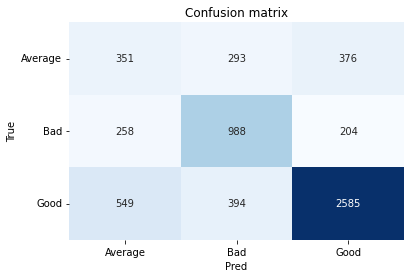

In [17]:
model = LogisticRegression(C=1e9)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nLogistic Regression:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + TfIdf Vectorizer + Text Preprocessing + Resampling', 
           'Algorithm':'Logistic Regression', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


SVM:
	Accuracy: 0.7237412470823608
	Precision: 0.6243415706420746
	Recall: 0.5888735570856695
	F1-Score: 0.584660750343487
Detail:
              precision    recall  f1-score   support

     Average       0.44      0.17      0.24      1020
         Bad       0.66      0.71      0.68      1450
        Good       0.78      0.89      0.83      3528

    accuracy                           0.72      5998
   macro avg       0.62      0.59      0.58      5998
weighted avg       0.69      0.72      0.69      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

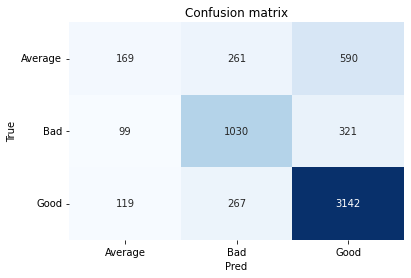

In [16]:
model = SVC()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nSVM:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + TfIdf Vectorizer + Text Preprocessing + Resampling', 
           'Algorithm':'SVM', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Multinomial NB:
	Accuracy: 0.6435478492830944
	Precision: 0.6113443554133986
	Recall: 0.6171676946640725
	F1-Score: 0.5961560667866788
Detail:
              precision    recall  f1-score   support

     Average       0.30      0.57      0.40      1020
         Bad       0.66      0.60      0.63      1450
        Good       0.88      0.68      0.77      3528

    accuracy                           0.64      5998
   macro avg       0.61      0.62      0.60      5998
weighted avg       0.73      0.64      0.67      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

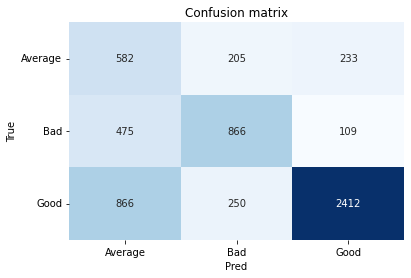

In [17]:
model = MultinomialNB()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nMultinomial NB:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + TfIdf Vectorizer + Text Preprocessing + Resampling', 
           'Algorithm':'Multinomial NB', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Decision Tree:
	Accuracy: 0.5831943981327109
	Precision: 0.49282902663395206
	Recall: 0.5014520444193002
	F1-Score: 0.4959392834602827
Detail:
              precision    recall  f1-score   support

     Average       0.26      0.28      0.27      1020
         Bad       0.47      0.54      0.50      1450
        Good       0.75      0.69      0.72      3528

    accuracy                           0.58      5998
   macro avg       0.49      0.50      0.50      5998
weighted avg       0.60      0.58      0.59      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

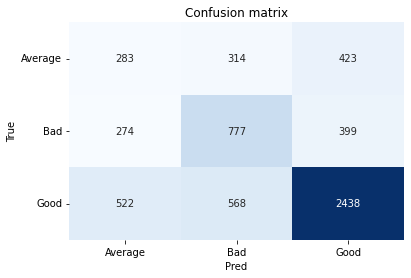

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nDecision Tree:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + TfIdf Vectorizer + Text Preprocessing + Resampling', 
           'Algorithm':'Decision Tree', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


KNN:
	Accuracy: 0.2732577525841947
	Precision: 0.4536402292619704
	Recall: 0.3566656624335558
	F1-Score: 0.21530376472156865
Detail:
              precision    recall  f1-score   support

     Average       0.20      0.10      0.14      1020
         Bad       0.25      0.90      0.39      1450
        Good       0.91      0.06      0.12      3528

    accuracy                           0.27      5998
   macro avg       0.45      0.36      0.22      5998
weighted avg       0.63      0.27      0.19      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

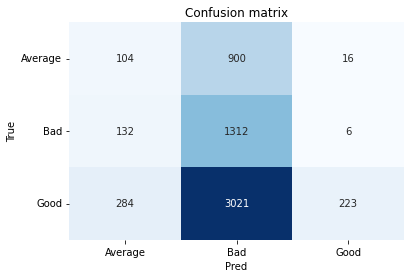

In [19]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nKNN:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + TfIdf Vectorizer + Text Preprocessing + Resampling', 
           'Algorithm':'KNN', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Random Forest:
	Accuracy: 0.6888962987662555
	Precision: 0.5750124791894705
	Recall: 0.5400014411895026
	F1-Score: 0.5274223399899797
Detail:
              precision    recall  f1-score   support

     Average       0.38      0.10      0.15      1020
         Bad       0.61      0.64      0.63      1450
        Good       0.74      0.88      0.80      3528

    accuracy                           0.69      5998
   macro avg       0.58      0.54      0.53      5998
weighted avg       0.65      0.69      0.65      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

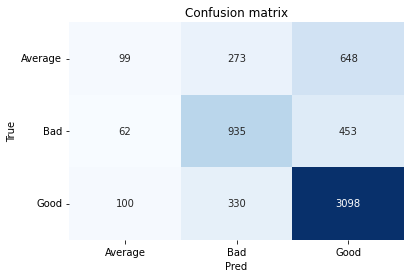

In [20]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nRandom Forest:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning + TfIdf Vectorizer + Text Preprocessing + Resampling', 
           'Algorithm':'Random Forest', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [21]:
evaluation.to_csv('results.csv')